In [72]:
import torch
from torch import nn
from torch.optim import SGD
import matplotlib.pyplot as plt
torch.__version__

'2.1.2'

In [16]:
weight = 0.7
bias = 0.3



start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

"X:", X[0: 10, :], "Y:", y[0:10, :]

('X:',
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 'Y:',
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [25]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), ".....", len(X_test), len(y_test)

(40, 40, '.....', 10, 10)

In [30]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

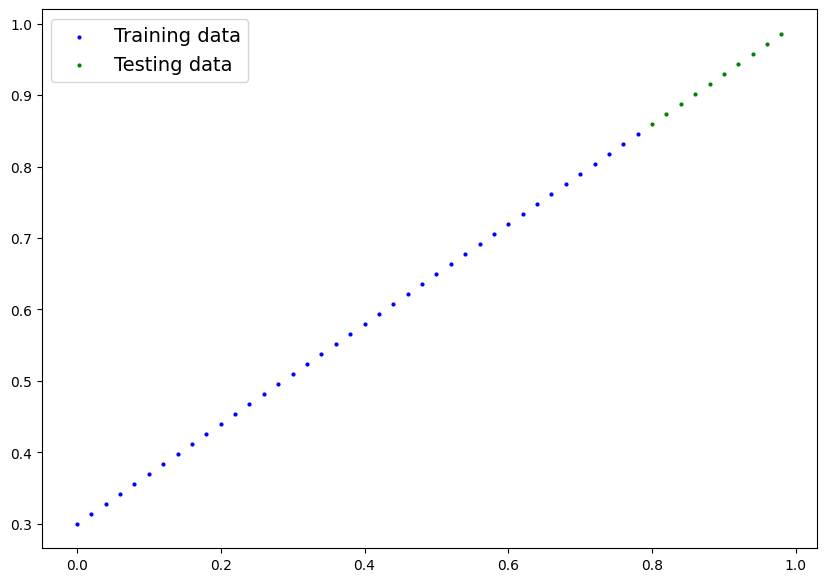

In [31]:
plot_predictions();

In [35]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, 
                            requires_grad=True,
                            dtype=torch.float)
                        )
        
        self.bias = nn.Parameter(torch.randn(1, 
                            requires_grad=True,
                            dtype=torch.float)
                        )
        
        # or 
        # Use nn.Linear() for creating the model parameters / also called: linear transform, 
        # probing layer, fully connected layer, dense layer
#         self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x):
        return self.weight * x + bias
    
#     def forward(self, x: torch.Tensor) -> torch.Tensor:
#         return self.linear_layer(x)
        

In [93]:
torch.manual_seed(42)
model_0 = LinearRegression()

In [94]:
print(list(model_0.parameters()))
model_0.weight

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


Parameter containing:
tensor([0.3367], requires_grad=True)

In [52]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [95]:
model_0.forward(X_train)

tensor([[0.3000],
        [0.3067],
        [0.3135],
        [0.3202],
        [0.3269],
        [0.3337],
        [0.3404],
        [0.3471],
        [0.3539],
        [0.3606],
        [0.3673],
        [0.3741],
        [0.3808],
        [0.3875],
        [0.3943],
        [0.4010],
        [0.4077],
        [0.4145],
        [0.4212],
        [0.4279],
        [0.4347],
        [0.4414],
        [0.4481],
        [0.4549],
        [0.4616],
        [0.4683],
        [0.4751],
        [0.4818],
        [0.4885],
        [0.4953],
        [0.5020],
        [0.5087],
        [0.5155],
        [0.5222],
        [0.5289],
        [0.5357],
        [0.5424],
        [0.5492],
        [0.5559],
        [0.5626]], grad_fn=<AddBackward0>)

In [97]:
with torch.inference_mode(): # or torch.no_grad()
    y_preds = model_0(X_test)
    
# y_preds = model_0(X_test)
y_preds

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])

In [64]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

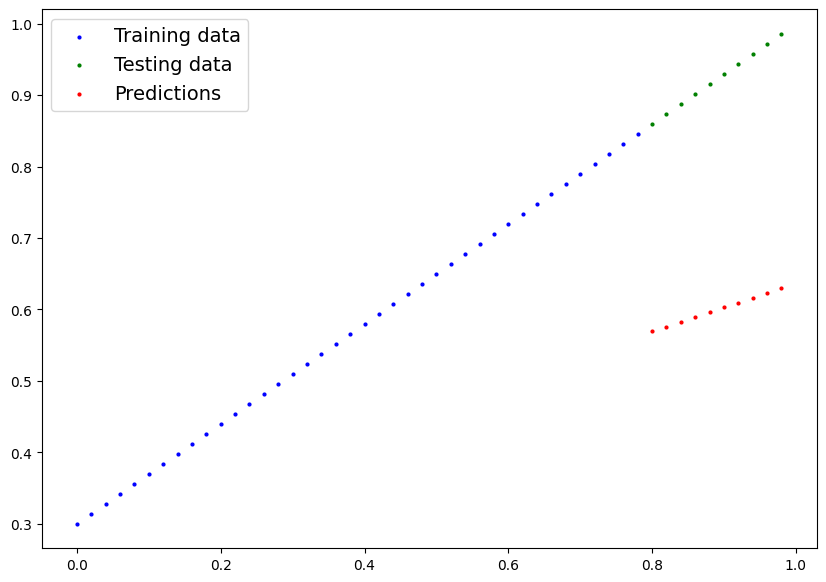

In [98]:
plot_predictions(predictions=y_preds);

In [99]:
loss_fn = nn.L1Loss() # How wrong the model is

optimizer = SGD(params=model_0.parameters(), lr=0.01)

In [100]:
# training loop

torch.manual_seed(42)

# Set the number of epochs 
epochs = 500

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # set the model to training mode (It's default)
    model_0.train()
    
    # 1. Forward pass
    y_preds = model_0.forward(X_train)
    
    # 2. Calculate loss
    loss = loss_fn(y_preds, y_train)
    
    # 3. Make gradients zero i.e reset gradients
    optimizer.zero_grad()
    
    # 4. Backpropagation on loss w.r.t parameters
    loss.backward()
    
    # 5. Gradient Descent (upadate the parameters - weights and bias)
    # Gradients that the optimizer calculates accumulates over time
    # with each epoch. That's why we need to reset it.
    optimizer.step() 
    
    # put the model in evaluation mode for testing (inference)
    # turns off differnet settings in the model not needed for the
    # evaluation/testing (like batch normalization, dropout etc)
    model_0.eval() # turns off the gradient tracking
    
    # turn off gradient tracking and couple more things behind the scenes
    with torch.inference_mode():
        
        # forward pass
        test_pred = model_0(X_test)
        
        # calculate test loss
        test_loss = loss_fn(test_pred, y_test)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.14169074594974518 | Test loss: 0.3198745846748352
Epoch: 10 | Train loss: 0.12648077309131622 | Test loss: 0.28516465425491333
Epoch: 20 | Train loss: 0.11127082258462906 | Test loss: 0.25045472383499146
Epoch: 30 | Train loss: 0.0960608422756195 | Test loss: 0.21574480831623077
Epoch: 40 | Train loss: 0.08085088431835175 | Test loss: 0.1810348629951477
Epoch: 50 | Train loss: 0.06564091145992279 | Test loss: 0.14632496237754822
Epoch: 60 | Train loss: 0.050430942326784134 | Test loss: 0.11161501705646515
Epoch: 70 | Train loss: 0.035220976918935776 | Test loss: 0.07690508663654327
Epoch: 80 | Train loss: 0.02001100964844227 | Test loss: 0.04219517856836319
Epoch: 90 | Train loss: 0.004801043774932623 | Test loss: 0.007485252805054188
Epoch: 100 | Train loss: 0.0012829385232180357 | Test loss: 0.000543272471986711
Epoch: 110 | Train loss: 0.0012829385232180357 | Test loss: 0.000543272471986711
Epoch: 120 | Train loss: 0.0012829385232180357 | Test loss: 0.000543

In [101]:
with torch.inference_mode(): # or torch.no_grad()
    y_preds = model_0(X_test)
    
# y_preds = model_0(X_test)
y_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

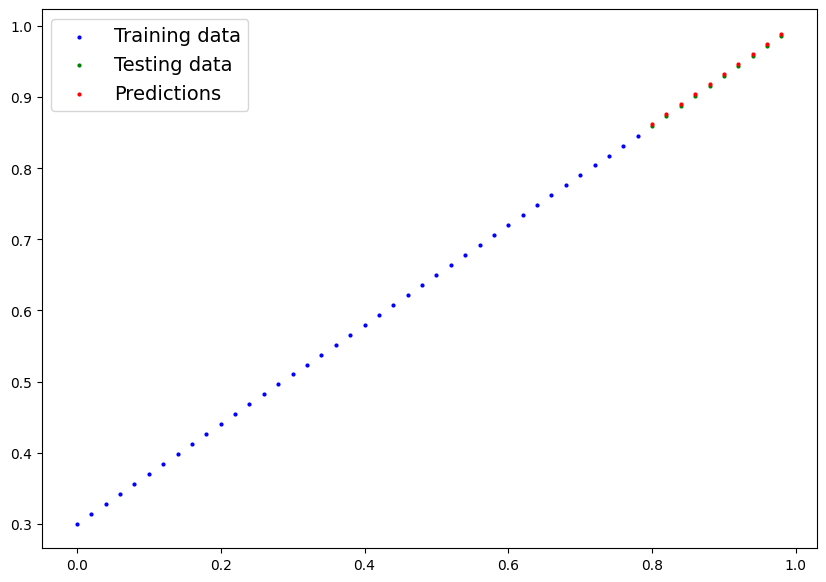

In [102]:
plot_predictions(predictions=y_preds);

In [103]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.7033])), ('bias', tensor([0.1288]))])

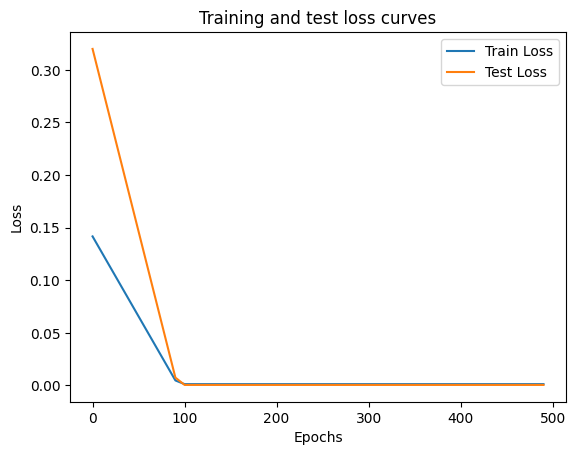

In [106]:
# Plot the loss curves

plt.plot(epoch_count, loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [108]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

# Saving and loading the model

In [109]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [110]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [111]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [113]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

In [114]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

In [115]:

# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [116]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [118]:
# !nvidia-smi

In [119]:

# Check the model current device
next(model_0.parameters()).device

device(type='cpu')

In [121]:
# Set the model to use the target device
model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')